In [1]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
mat = loadmat('./ex3/ex3data1.mat')

In [3]:
X = mat['X']
y = mat['y']
print("X dimension: ", X.shape)
print("y dimension", y.shape)

X dimension:  (5000, 400)
y dimension (5000, 1)


## Multi-class Classification

### Visualizing the data

In [4]:
# randomly select 100 rows from X
rand_index = np.random.choice(5000, 100, replace=False)

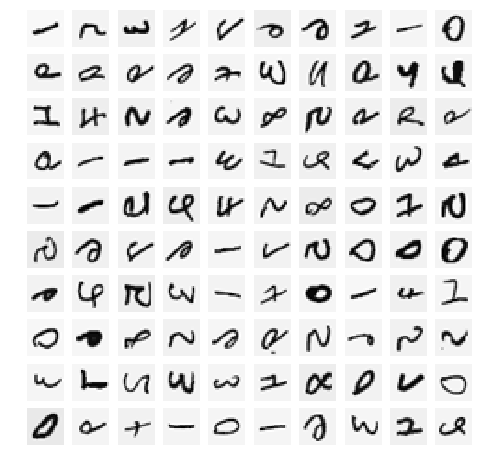

In [5]:
rand_x = X[rand_index,:].reshape([100, 20, 20])

fig = plt.figure(figsize=(8,8))
for i in range(100):
    fig.add_subplot(10, 10, i+1)
    plt.imshow(rand_x[i], interpolation='nearest', cmap=plt.cm.binary)
    plt.axis('off')
plt.show()

### Vectoring Logistic Regression

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def lrCostFunction(theta, x, y):
    h = sigmoid(np.dot(x, theta))
    cost = -np.mean(np.multiply(y, np.log(h + 1e-8)) + np.multiply(1 - y, np.log(1 - h + 1e-8)))
    grad = np.dot(x.T, h - y) / len(y)
    return (cost, grad)

In [7]:
def lrCostFunctionReg(theta, x, y, alpha0):
    h = sigmoid(np.dot(x, theta))
    cost = -np.mean(np.multiply(y, np.log(h + 1e-8)) + np.multiply(1 - y, np.log(1 - h + 1e-8)))
    cost += alpha0 * np.dot(theta[1:], theta[1:]) / (2 * len(y))
    return cost

In [8]:
def lrGradientDescentReg(theta, x, y, alpha0):
    m = len(y)
    h = sigmoid(np.dot(x, theta))
    grad = np.dot(x.T, h - y) / m
    grad[1:] += alpha0 * theta[1:] / m
    return grad.reshape(-1)

In [9]:
num_ob, num_dim = X.shape
X_TEST = np.hstack([np.ones([num_ob, 1]), X])
Y_TEST = y.reshape(-1)
THETA = np.zeros(num_dim + 1)
ALPHA0 = 1

init_cost = lrCostFunctionReg(THETA, X_TEST, Y_TEST, ALPHA0)
init_grad = lrGradientDescentReg(THETA, X_TEST, Y_TEST, ALPHA0)
print("Initial Cost: %.3f" % init_cost)
print("Initial (First 5) Grad: ", init_grad[:5])

Initial Cost: 160.394
Initial (First 5) Grad:  [ -5.00000000e+00   0.00000000e+00   0.00000000e+00  -7.74530186e-08
   3.19876600e-06]


### One-vs-all Classification

In [10]:
def oneVsAll(x, y, num_labels, alpha0):
    m, p = x.shape
    x = np.hstack([np.ones([m, 1]), x])
    y = y.reshape(-1)
    initial_theta = np.zeros([p + 1, 1])
    all_thetas = np.zeros([num_labels, p + 1])
    for c in np.arange(1, num_labels+1):
        op = minimize(lrCostFunctionReg, x0=initial_theta, jac=lrGradientDescentReg, 
                      args=(x, y==c, alpha0), method=None, options={'disp': False, 'maxiter': 400})
        all_thetas[c-1] = op.x
    return all_thetas

In [11]:
def predictOneVsAll(x, theta, return_prob=False):
    x = np.hstack([np.ones([x.shape[0], 1]), x])
    probs = sigmoid(np.dot(x, theta.T))
    if return_prob:
        return probs
    else:
        classes = probs.argmax(axis=1) + 1
        return classes

In [12]:
ALL_THETAs = oneVsAll(X, y, 10, 0.1)
pred = predictOneVsAll(X, ALL_THETAs)
training_accuracy = np.mean(pred == y.ravel())
print("Training Set Accuracy: {}".format(training_accuracy))

Training Set Accuracy: 0.9648


## Neural Networks

In [13]:
weights_mat = loadmat('./ex3/ex3weights.mat')

In [14]:
theta1 = weights_mat['Theta1']
theta2 = weights_mat['Theta2']
print("Theta1 shape: ",theta1.shape)
print("Theta2 shape: ",theta2.shape)

Theta1 shape:  (25, 401)
Theta2 shape:  (10, 26)


In [15]:
def predict(x, theta1, theta2):
    m = x.shape[0]
    x = np.hstack([np.ones([m, 1]), x])
    l1_result = sigmoid(np.dot(x, theta1.T))
    l1_result = np.hstack([np.ones([m, 1]), l1_result])
    probs = sigmoid(np.dot(l1_result, theta2.T))
    classes = probs.argmax(axis=1) + 1
    return classes

In [16]:
pred2 = predict(X, theta1, theta2)
training_accuracy2 = np.mean(pred2 == y.reshape(-1))
print("Training Set Accuracy: {}".format(training_accuracy2))

Training Set Accuracy: 0.9752
